<a id="content"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Content</p>

* [Introduction](#0)
* [About Dataset](#1)
* [Importing Related Libraries](#2)
* [Recognizing & Understanding Data](#3)
* [Univariate & Multivariate Analysis](#4)    
* [Other Specific Analysis Questions](#5)
* [Dropping Similar & Unneccessary Features](#6)
* [Handling with Missing Values](#7)
* [Handling with Outliers](#8)    
* [Final Step to make ready dataset for ML Models](#9)
* [The End of the Project](#10)

One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is **good practice to understand the problem statement** and the data before you get your hands dirty, which in view, **helps to gain a lot of insights**. I will try to explain the concept using the Adult dataset/Census Income dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data.

**Aim of the Project**

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

<a id="1"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">About Dataset</p>


The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
#Conf 
import pandas as pd 

from IPython.display import clear_output
import seaborn as sns
import math

from rich.console import Console
from rich.table import Table
console = Console()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)          
pd.set_option('display.max_rows',100)

#Mervan Kanat


## Reading the Data from File

In [2]:
df = pd.read_csv('adult_eda.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<a id="3"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Recognizing and Understanding Data</p>


## Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- Basically check the missing values. (NaN, None)
- If needed, rename the columns' names for easy use.

### Check the head, shape, data-types of the features.

In [3]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13.0,13.0,9.0,7.0,13.0
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [4]:

# 'output' sütunundaki benzersiz değerlerin sayısını almak için
unique_output_count = df['salary'].nunique()
print("Unique output values count:", unique_output_count)

# 'output' sütunundaki her bir değerin tekrar sayısını almak için
value_counts_output = df['salary'].value_counts()
print(value_counts_output)

Unique output values count: 2
<=50K    24720
>50K      7841
Name: salary, dtype: int64


In [5]:
df.info()
pd.value_counts(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


object     9
int64      5
float64    1
dtype: int64

In [6]:
df.shape

(32561, 15)

### Check if there are some dublicate rows or not. If there are, then drop them.

In [7]:

duplicates = df.duplicated().sum()
if duplicates > 0:
    original_shape = df.shape
    df.drop_duplicates(inplace=True)
    new_shape = df.shape
    print(f"{duplicates} duplicates were found and removed. Original shape was {original_shape}, new shape of the dataframe is {new_shape}.")
else:
    print("No duplicates were found.")


24 duplicates were found and removed. Original shape was (32561, 15), new shape of the dataframe is (32537, 15).


### Check the statistical values of features.

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,31735.0,10.084008,2.575060,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


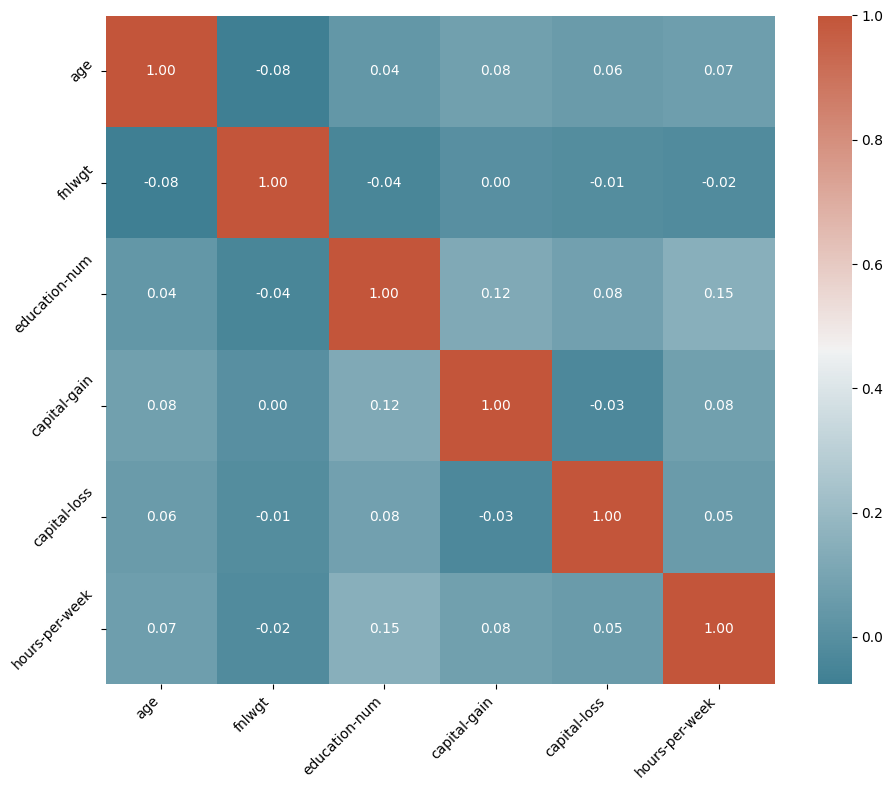

In [9]:
corr=df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True), cbar=True, square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


### Basically check the missing values. (NaN, None)

In [10]:
missing_values = df.isnull().sum()

missing_values

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

### If needed, rename the columns' names for easy use. 

In [11]:

current_columns = df.columns

new_column_names = {col: col.replace('-', '_') for col in current_columns}

df.rename(columns=new_column_names, inplace=True)

df.rename(columns={'fnlwgt': 'population_weight'}, inplace=True)

new_columns = df.columns

df.columns

Index(['age', 'workclass', 'population_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

## Examining the Data
- Look at the counts of columns that have OBJECT datatype 
- Assign the Columns (Features) of object data type as** **`"object_col"`**
- Detect strange values apart from the NaN Values.(isin(),Count(),Sum(),Any())

### Assign the Columns (Features) of object data type as** **``"object_col"``

In [12]:

object_col = df.select_dtypes(include=['object']).columns

object_col


Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

### Look at the value counts of columns that have OBJECT datatype

In [13]:

column_counter = 1

for column in object_col:
    
    table = Table(title=f"{column_counter}. Value Counts for {column}", show_header=True, header_style="bold magenta")
    table.add_column("Value", style="dim")
    table.add_column("Count")
    
    
    for value, count in df[column].value_counts().iteritems():
        table.add_row(str(value), str(count))
    
    console.print(table)
    
    column_counter += 1

    1. Value Counts for     
         workclass          
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value            ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Private          │ 22673 │
│ Self-emp-not-inc │ 2540  │
│ Local-gov        │ 2093  │
│ ?                │ 1836  │
│ State-gov        │ 1298  │
│ Self-emp-inc     │ 1116  │
│ Federal-gov      │ 960   │
│ Without-pay      │ 14    │
│ Never-worked     │ 7     │
└──────────────────┴───────┘

  2. Value Counts for   
       education        
┏━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value        ┃ Count ┃
┡━━━━━━━━━━━━━━╇━━━━━━━┩
│ HS-grad      │ 10494 │
│ Some-college │ 7282  │
│ Bachelors    │ 5353  │
│ Masters      │ 1722  │
│ Assoc-voc    │ 1382  │
│ 11th         │ 1175  │
│ Assoc-acdm   │ 1067  │
│ 10th         │ 933   │
│ 7th-8th      │ 645   │
│ Prof-school  │ 576   │
│ 9th          │ 514   │
│ 12th         │ 433   │
│ Doctorate    │ 413   │
│ 5th-6th      │ 332   │
│ 1st-4th      │ 166   │
│ Preschool    │ 50    │
└──────────────┴───────┘

       3. Value Counts for       
         marital_status          
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value                 ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Married-civ-spouse    │ 14970 │
│ Never-married         │ 10667 │
│ Divorced              │ 4441  │
│ Separated             │ 1025  │
│ Widowed               │ 993   │
│ Married-spouse-absent │ 418   │
│ Married-AF-spouse     │ 23    │
└───────────────────────┴───────┘

     4. Value Counts for     
         occupation          
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Prof-specialty    │ 4136  │
│ Craft-repair      │ 4094  │
│ Exec-managerial   │ 4065  │
│ Adm-clerical      │ 3768  │
│ Sales             │ 3650  │
│ Other-service     │ 3291  │
│ Machine-op-inspct │ 2000  │
│ ?                 │ 1843  │
│ Transport-moving  │ 1597  │
│ Handlers-cleaners │ 1369  │
│ Farming-fishing   │ 992   │
│ Tech-support      │ 927   │
│ Protective-serv   │ 649   │
│ Priv-house-serv   │ 147   │
│ Armed-Forces      │ 9     │
└───────────────────┴───────┘

   5. Value Counts for    
       relationship       
┏━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value          ┃ Count ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Husband        │ 13187 │
│ Not-in-family  │ 8292  │
│ Unmarried      │ 3445  │
│ Wife           │ 1568  │
│ Other-relative │ 981   │
└────────────────┴───────┘

   6. Value Counts for race   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value              ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ White              │ 27795 │
│ Black              │ 3122  │
│ Asian-Pac-Islander │ 1038  │
│ Amer-Indian-Eskimo │ 311   │
│ Other              │ 271   │
└────────────────────┴───────┘

 7. Value Counts  
     for sex      
┏━━━━━━━━┳━━━━━━━┓
┃ Value  ┃ Count ┃
┡━━━━━━━━╇━━━━━━━┩
│ Male   │ 21775 │
│ Female │ 10762 │
└────────┴───────┘

  8. Value Counts for native_country  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Value                      ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ United-States              │ 29153 │
│ Mexico                     │ 639   │
│ ?                          │ 582   │
│ Philippines                │ 198   │
│ Germany                    │ 137   │
│ Canada                     │ 121   │
│ Puerto-Rico                │ 114   │
│ El-Salvador                │ 106   │
│ India                      │ 100   │
│ Cuba                       │ 95    │
│ England                    │ 90    │
│ Jamaica                    │ 81    │
│ South                      │ 80    │
│ China                      │ 75    │
│ Italy                      │ 73    │
│ Dominican-Republic         │ 70    │
│ Vietnam                    │ 67    │
│ Japan                      │ 62    │
│ Guatemala                  │ 62    │
│ Poland                     │ 60    │
│ Columbia                   │ 59    │
│ Taiwan                     │ 51    │
│ Haiti                      │ 44    │
│ Iran                       │ 43    │
│ Portugal                   │ 37    │
│ Nicaragua                  │ 34    │
│ Peru                       │ 31    │
│ France                     │ 29    │
│ Greece                     │ 29    │
│ Ecuador                    │ 28    │
│ Ireland                    │ 24    │
│ Hong                       │ 20    │
│ Cambodia                   │ 19    │
│ Trinadad&Tobago            │ 19    │
│ Laos                       │ 18    │
│ Thailand                   │ 18    │
│ Yugoslavia                 │ 16    │
│ Outlying-US(Guam-USVI-etc) │ 14    │
│ Honduras                   │ 13    │
│ Hungary                    │ 13    │
│ Scotland                   │ 12    │
│ Holand-Netherlands         │ 1     │
└────────────────────────────┴───────┘

 9. Value Counts 
   for salary    
┏━━━━━━━┳━━━━━━━┓
┃ Value ┃ Count ┃
┡━━━━━━━╇━━━━━━━┩
│ <=50K │ 24698 │
│ >50K  │ 7839  │
└───────┴───────┘

In [14]:
for col in object_col:
    print(col)
    print("--"*20)
    print(df[col].value_counts(dropna=False))
    print("//"*20)

workclass
----------------------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
////////////////////////////////////////
education
----------------------------------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
////////////////////////////////////////
marital_status
----------------------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated            

### Detect strange values apart from the NaN Values.(isin(),Count(),Sum(),Any())

In [15]:

df['salary_numeric'] = df['salary'].map({'>50K': 1, '<=50K': 0})

corr_matrix = df.corr()
target_corr = corr_matrix['salary_numeric'].sort_values(ascending=False)

target_corr


salary_numeric       1.000000
education_num        0.334731
age                  0.234037
hours_per_week       0.229658
capital_gain         0.223336
capital_loss         0.150501
population_weight   -0.009502
Name: salary_numeric, dtype: float64

In [16]:
#isin(), sum()
strange_values_summary = {}

for column in object_col:
  
    strange_values = df[column].isin(['?', 'unknown']).sum()
    if strange_values > 0:
        strange_values_summary[column] = strange_values

strange_values_summary


{'workclass': 1836, 'occupation': 1843, 'native_country': 582}

In [17]:
#any,count

columns_to_check = ['workclass', 'occupation']
strange_values = ['?']

for column in columns_to_check:
    mask = df[column].isin(strange_values)
    strange_values_count = mask.sum()  
    total_non_null_values = df[column].count() 
    
    if mask.any():
        print(f"'{column}' contains {strange_values_count} strange values out of {total_non_null_values} non-null values")
        print(df.loc[mask, column].head())
    else:
        print(f"No strange values found in '{column}'")


'workclass' contains 1836 strange values out of 32537 non-null values
27     ?
61     ?
69     ?
77     ?
106    ?
Name: workclass, dtype: object
'occupation' contains 1843 strange values out of 32537 non-null values
27     ?
61     ?
69     ?
77     ?
106    ?
Name: occupation, dtype: object


<a id="4"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Univariate & Multivariate Analysis</p>


Examine all Features:
- **Target Feature**
- **Numeric Ones**
- **Categoric Ones** separately from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by target feature
5. Check the statistical values by target feature
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count/percentage in each target feature by categories and visualize it with a suitable plot
5. Check the percentage distribution in each target feature by categories and visualize it with suitable plot
6. Check the count in each categories by target feature and visualize it with a suitable plot
7. Check the percentage distribution in each categories by target feature and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** **Instruction/direction** for each feature is available under the corresponding feature in detail, as well.

## Target Feature
- Salary

In [18]:

table = Table(show_header=True, header_style="bold magenta")
table.add_column("Variable", style="dim", width=21)
table.add_column("Correlation with salary_numeric", justify="right")


for index, value in target_corr.items():
    table.add_row(index, f"{value:.2f}")


console.print(table)

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Variable              ┃ Correlation with salary_numeric ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ salary_numeric        │                            1.00 │
│ education_num         │                            0.33 │
│ age                   │                            0.23 │
│ hours_per_week        │                            0.23 │
│ capital_gain          │                            0.22 │
│ capital_loss          │                            0.15 │
│ population_weight     │                           -0.01 │
└───────────────────────┴─────────────────────────────────┘

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
from rich.console import Console
from rich.table import Table

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


categorical_cols = df.select_dtypes(include=['object']).columns


console = Console()
table = Table(show_header=True, header_style="bold magenta")
table.add_column("Variable Pair", style="dim", width=40)
table.add_column("Cramer's V", justify="right")


for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        x = categorical_cols[i]
        y = categorical_cols[j]
        cramers_v_value = cramers_v(df[x], df[y])
        table.add_row(f"{x} & {y}", f"{cramers_v_value:.2f}")


table
from rich.console import Console
from rich.table import Table


relationship_categories = {
    "Very Weak Relationship": [],
    "Weak Relationship": [],
    "Moderate Relationship": [],
    "Strong Relationship": [],
    "Very Strong Relationship": []
}


for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        x = categorical_cols[i]
        y = categorical_cols[j]
        cramers_v_value = cramers_v(df[x], df[y])
        
      
        if cramers_v_value < 0.1:
            category = "Very Weak Relationship"
        elif cramers_v_value < 0.4:
            category = "Weak Relationship"
        elif cramers_v_value < 0.6:
            category = "Moderate Relationship"
        elif cramers_v_value < 0.8:
            category = "Strong Relationship"
        else:
            category = "Very Strong Relationship"
        
        relationship_categories[category].append((f"{x} & {y}", f"{cramers_v_value:.2f}"))


for category, pairs in relationship_categories.items():
    if pairs: 
        table = Table(show_header=True, header_style="bold magenta")
        table.add_column("Variable Pair", style="dim", width=40)
        table.add_column("Cramer's V", justify="right")
        
        for pair in pairs:
            table.add_row(pair[0], pair[1])
        
        console.print(f"[bold]{category}[/bold]")
        console.print(table)
        console.print("\n") 


Very Weak Relationship

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Variable Pair                            ┃ Cramer's V ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ workclass & education                    │       0.10 │
│ workclass & marital_status               │       0.08 │
│ workclass & relationship                 │       0.09 │
│ workclass & race                         │       0.05 │
│ workclass & native_country               │       0.03 │
│ education & marital_status               │       0.09 │
│ education & relationship                 │       0.09 │
│ education & race                         │       0.07 │
│ education & sex                          │       0.09 │
│ marital_status & race                    │       0.08 │
│ marital_status & native_country          │       0.06 │
│ occupation & race                        │       0.08 │
│ occupation & native_country              │       0.06 │
│ relationship & native_country            │       0.09 │
│ sex & native_country                     │       0.06 │
│ native_country & salary                  │       0.09 │
└──────────────────────────────────────────┴────────────┘

Weak Relationship

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Variable Pair                            ┃ Cramer's V ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ workclass & occupation                   │       0.40 │
│ workclass & sex                          │       0.15 │
│ workclass & salary                       │       0.18 │
│ education & occupation                   │       0.19 │
│ education & native_country               │       0.13 │
│ education & salary                       │       0.37 │
│ marital_status & occupation              │       0.13 │
│ occupation & relationship                │       0.18 │
│ occupation & salary                      │       0.35 │
│ relationship & race                      │       0.11 │
│ race & sex                               │       0.12 │
│ race & salary                            │       0.10 │
│ sex & salary                             │       0.22 │
└──────────────────────────────────────────┴────────────┘

Moderate Relationship

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Variable Pair                            ┃ Cramer's V ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ marital_status & relationship            │       0.52 │
│ marital_status & sex                     │       0.46 │
│ marital_status & salary                  │       0.45 │
│ occupation & sex                         │       0.42 │
│ relationship & salary                    │       0.40 │
│ race & native_country                    │       0.41 │
└──────────────────────────────────────────┴────────────┘

Strong Relationship

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Variable Pair                            ┃ Cramer's V ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ relationship & sex                       │       0.71 │
└──────────────────────────────────────────┴────────────┘

## Numeric Features

Creating Histogram of age...

Creating Histogram of population_weight...

Creating Histogram of education_num...

Creating Histogram of capital_gain...

Creating Histogram of capital_loss...

Creating Histogram of hours_per_week...

Creating Histogram of salary_numeric...

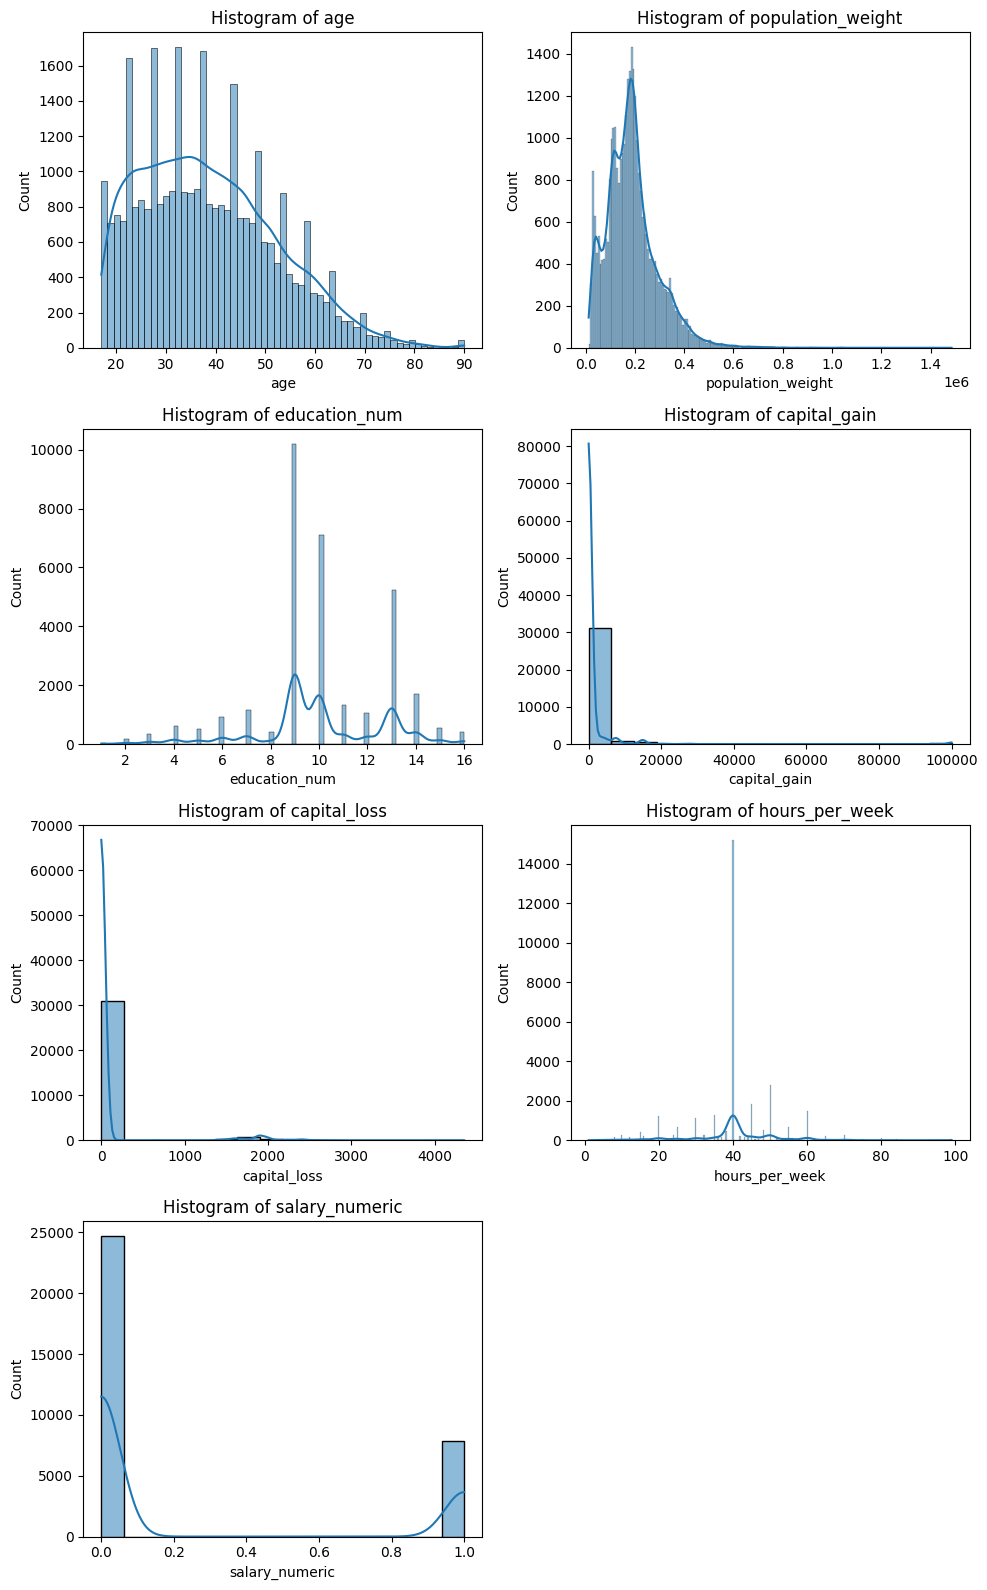

Creating Boxplot of age...

Creating Boxplot of population_weight...

Creating Boxplot of education_num...

Creating Boxplot of capital_gain...

Creating Boxplot of capital_loss...

Creating Boxplot of hours_per_week...

Creating Boxplot of salary_numeric...

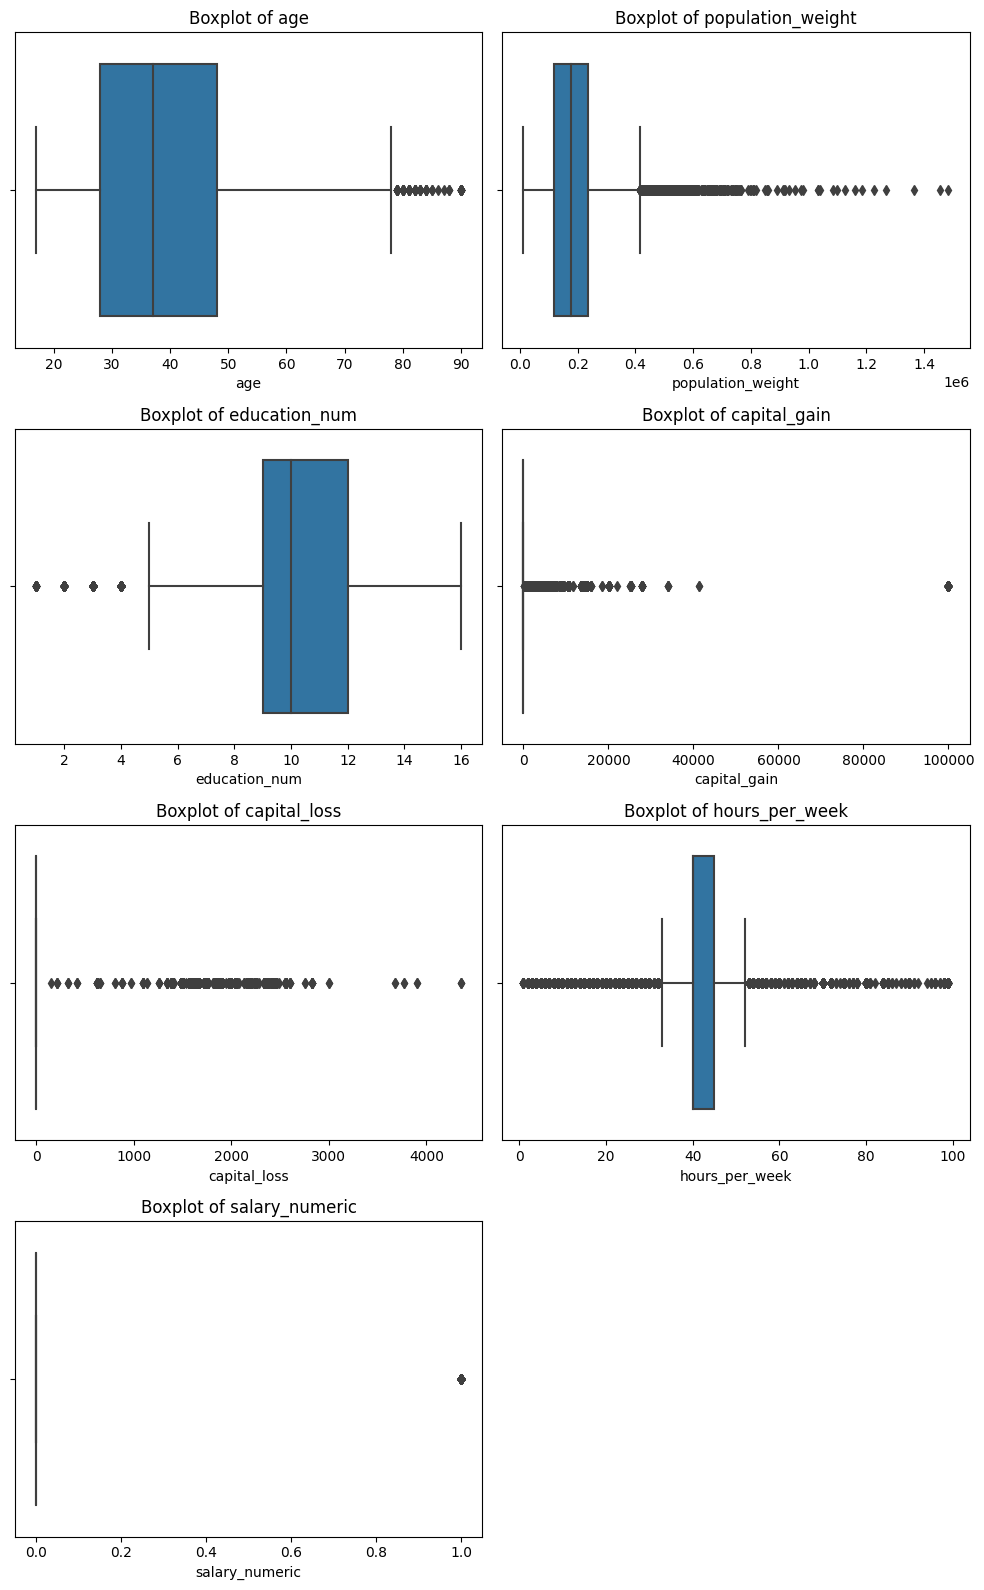

Creating Boxplot_salary of age...

Creating Boxplot_salary of population_weight...

Creating Boxplot_salary of education_num...

Creating Boxplot_salary of capital_gain...

Creating Boxplot_salary of capital_loss...

Creating Boxplot_salary of hours_per_week...

Creating Boxplot_salary of salary_numeric...

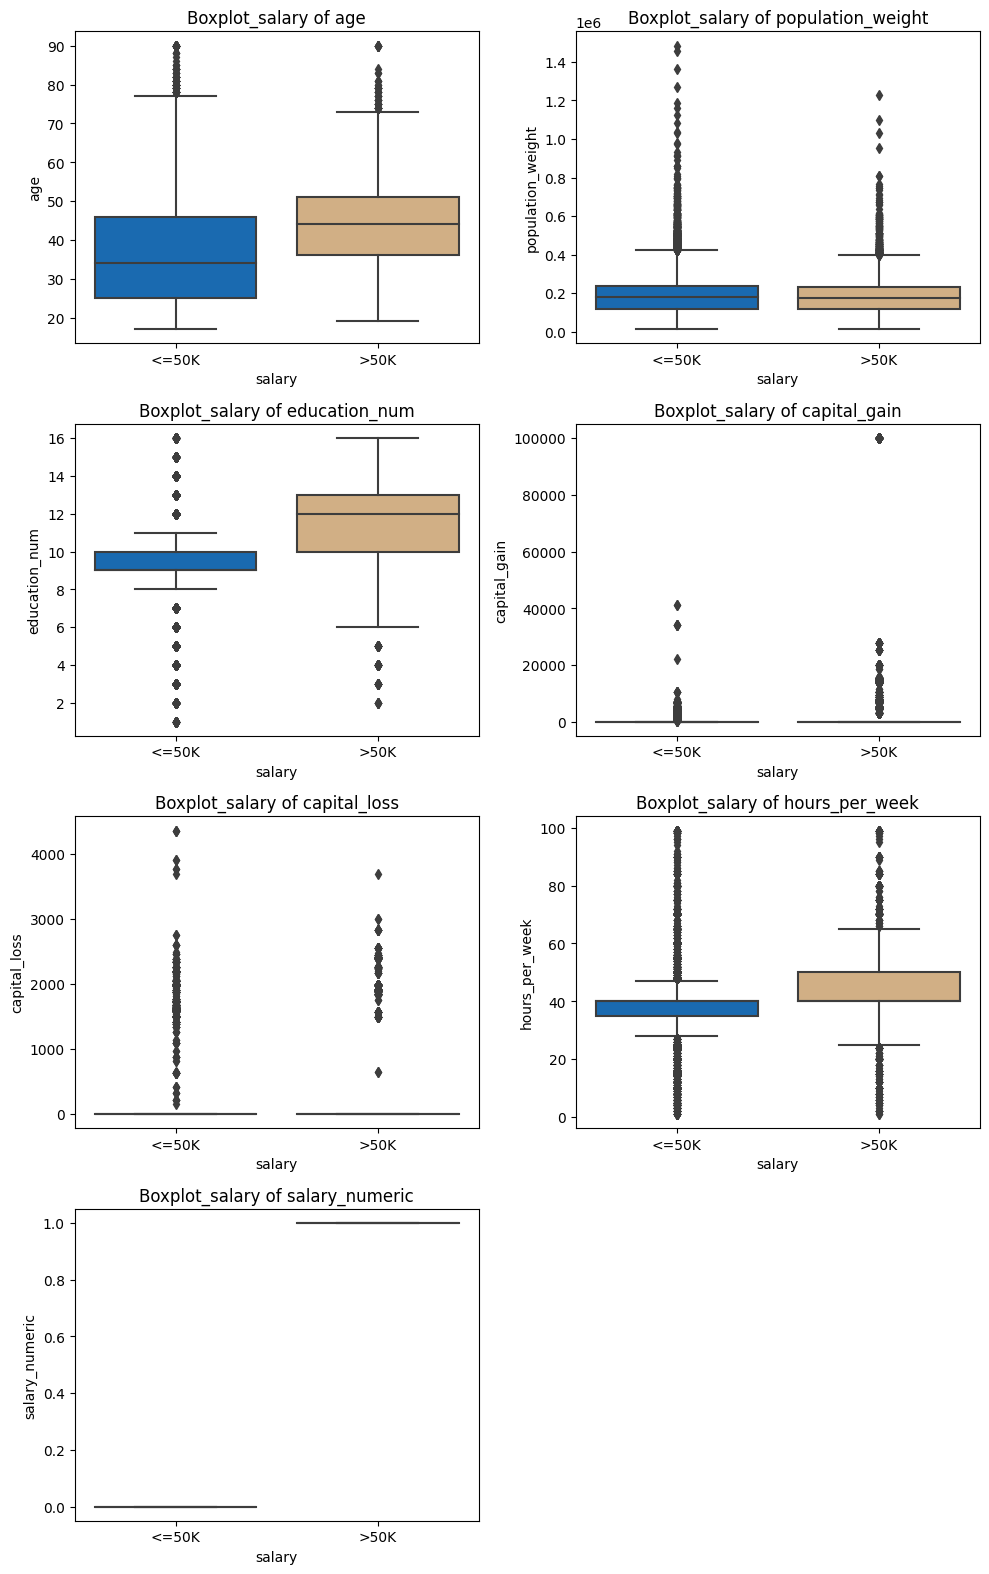

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


def plot_numerical_features(df, plot_type, target_feature=None):
    
    num_plots = len(numerical_cols)
    n_cols = 2  
    n_rows = math.ceil(num_plots / n_cols)  

  
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))  

  
    for i, col in enumerate(numerical_cols):
        ax = axes[i // n_cols, i % n_cols] 
        plot_title = f'{plot_type.capitalize()} of {col}'
        
       
        console.print(f"[bold magenta]Creating {plot_title}...[/bold magenta]", justify="center")
        
        if plot_type == 'histogram':
            sns.histplot(df[col], kde=True, ax=ax)
        elif plot_type == 'boxplot':
            sns.boxplot(x=df[col], ax=ax)
        elif plot_type == 'boxplot_salary' and target_feature:
            sns.boxplot(x=target_feature, y=col, data=df, palette=['#016CC9', '#DEB078'], ax=ax)
            
        ax.set_title(plot_title)

    
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols, j % n_cols])
         
    plt.tight_layout()
    plt.show()

plot_numerical_features(df, 'histogram', target_feature=None)
plot_numerical_features(df, 'boxplot', target_feature=None)    
plot_numerical_features(df, 'boxplot_salary', 'salary')  


In [21]:

import scipy.stats as stats

console.print("\nMean values of Numerical Features by 'salary':", style="bold magenta")
mean_values_table = Table(show_header=True, header_style="bold blue")
mean_values_table.add_column("Feature", style="dim")
mean_values_table.add_column("Mean by Salary", justify="right")

grouped_means = df.groupby('salary')[numerical_cols].mean()
for col in numerical_cols:
    for salary_category in grouped_means.index:
        mean_value = grouped_means.at[salary_category, col]
        mean_values_table.add_row(f"{col} ({salary_category})", f"{mean_value:.2f}")

console.print(mean_values_table)



skew_kurt_table = Table(title="Skewness and Kurtosis for Numerical Features", show_header=True, header_style="bold blue")
skew_kurt_table.add_column("Feature", style="dim")
skew_kurt_table.add_column("Skewness", justify="right")
skew_kurt_table.add_column("Kurtosis", justify="right")

for col in numerical_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    skew_kurt_table.add_row(col, f"{skew:.2f}", f"{kurt:.2f}")

console.print(skew_kurt_table)


if 'salary' in numerical_cols:
    numerical_cols = [col for col in numerical_cols if col != 'salary']


anova_table = Table(title="ANOVA Test Results for Numerical Features by 'salary'", show_header=True, header_style="bold blue")
anova_table.add_column("Feature", style="dim")
anova_table.add_column("F-value", justify="right")
anova_table.add_column("p-value", justify="right")


if 'salary' in df.columns and df['salary'].dtype == 'O':  
    for col in numerical_cols:
        groups = df.groupby('salary')[col].apply(list)
        f_value, p_value = stats.f_oneway(*groups)
        anova_table.add_row(col, f"{f_value:.2f}", f"{p_value:.3f}")

console.print(anova_table)


Mean values of Numerical Features by 'salary':

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Feature                   ┃ Mean by Salary ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ age (<=50K)               │          36.79 │
│ age (>50K)                │          44.25 │
│ population_weight (<=50K) │      190345.93 │
│ population_weight (>50K)  │      188000.48 │
│ education_num (<=50K)     │           9.60 │
│ education_num (>50K)      │          11.62 │
│ capital_gain (<=50K)      │         148.88 │
│ capital_gain (>50K)       │        4007.16 │
│ capital_loss (<=50K)      │          53.19 │
│ capital_loss (>50K)       │         195.05 │
│ hours_per_week (<=50K)    │          38.84 │
│ hours_per_week (>50K)     │          45.47 │
│ salary_numeric (<=50K)    │           0.00 │
│ salary_numeric (>50K)     │           1.00 │
└───────────────────────────┴────────────────┘

    Skewness and Kurtosis for Numerical    
                 Features                  
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Feature           ┃ Skewness ┃ Kurtosis ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ age               │     0.56 │    -0.17 │
│ population_weight │     1.45 │     6.22 │
│ education_num     │    -0.31 │     0.61 │
│ capital_gain      │    11.95 │   154.68 │
│ capital_loss      │     4.59 │    20.36 │
│ hours_per_week    │     0.23 │     2.92 │
│ salary_numeric    │     1.21 │    -0.53 │
└───────────────────┴──────────┴──────────┘

ANOVA Test Results for Numerical Features
               by 'salary'               
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ Feature           ┃ F-value ┃ p-value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ age               │ 1885.32 │   0.000 │
│ population_weight │    2.94 │   0.087 │
│ education_num     │     nan │     nan │
│ capital_gain      │ 1708.01 │   0.000 │
│ capital_loss      │  754.01 │   0.000 │
│ hours_per_week    │ 1811.53 │   0.000 │
│ salary_numeric    │     inf │   0.000 │
└───────────────────┴─────────┴─────────┘

In [22]:

from rich.markdown import Markdown

analysis_results = """
### Analysis Conclusions

1. **Age**: Older individuals tend to earn above $50K. == > experience, career progression, or seniority
2. **Population Weight**: No significant difference by salary groups.
3. **Education**: Higher education correlates with higher earnings.
4. **Capital Gains/Losses**: Higher gains and lower losses are associated with >$50K salaries.
5. **Hours per Week**: More hours worked generally means higher earnings.
6. **Skewness/Kurtosis**:Variables like `capital_gain` show high skewness, which can lead to overestimation of infrequent high values in predictive models.
Data transformation or outlier treatment may be needed to mitigate this effect and improve model accuracy.
**ANOVA Tests:** Low p-values for variables such as `age` and `hours_per_week` suggest these features significantly differentiate between salary groups.
These variables should be prioritized during feature engineering and selection to enhance the model's predictive performance.
"""

console.print(Markdown(analysis_results))


Analysis Conclusions                                                

 1 Age: Older individuals tend to earn above $50K. == > experience, career progression, or seniority               
 2 Population Weight: No significant difference by salary groups.                                                  
 3 Education: Higher education correlates with higher earnings.                                                    
 4 Capital Gains/Losses: Higher gains and lower losses are associated with >$50K salaries.                         
 5 Hours per Week: More hours worked generally means higher earnings.                                              
 6 Skewness/Kurtosis:Variables like capital_gain show high skewness, which can lead to overestimation of infrequent
   high values in predictive models. Data transformation or outlier treatment may be needed to mitigate this effect
   and improve model accuracy. ANOVA Tests: Low p-values for variables such as age and hours_per_week suggest these
   features significantly differentiate between salary groups. These variables should be prioritized during feature
   engineering and selection to enhance the model's predictive performance.

## Categorical Features

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count/percentage in each target feature by categories and visualize it with a suitable plot
5. Check the percentage distribution in each target feature by categories and visualize it with suitable plot
6. Check the count in each categories by target feature and visualize it with a suitable plot
7. Check the percentage distribution in each categories by target feature and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis


In [23]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

similar_values_dict = {}


for col in categorical_cols:
    unique_values = df[col].unique()
    similar_values_dict[col] = {}
    
    for other_col in categorical_cols:
        if other_col == col:
            continue  
     
        similar_values = set(unique_values) & set(df[other_col].unique())
        if similar_values:
            similar_values_dict[col][other_col] = similar_values


for col, related_cols in similar_values_dict.items():
    if related_cols: 
        console.print(f"Column [bold magenta]{col}[/bold magenta] has similar values with:", style="bold blue")
        for related_col, values in related_cols.items():
            console.print(f"  - [bold]{related_col}[/bold]: {values}")
        console.print("\n")


Column workclass has similar values with:

- occupation: {'?'}

- native_country: {'?'}

Column occupation has similar values with:

- workclass: {'?'}

- native_country: {'?'}

Column native_country has similar values with:

- workclass: {'?'}

- occupation: {'?'}

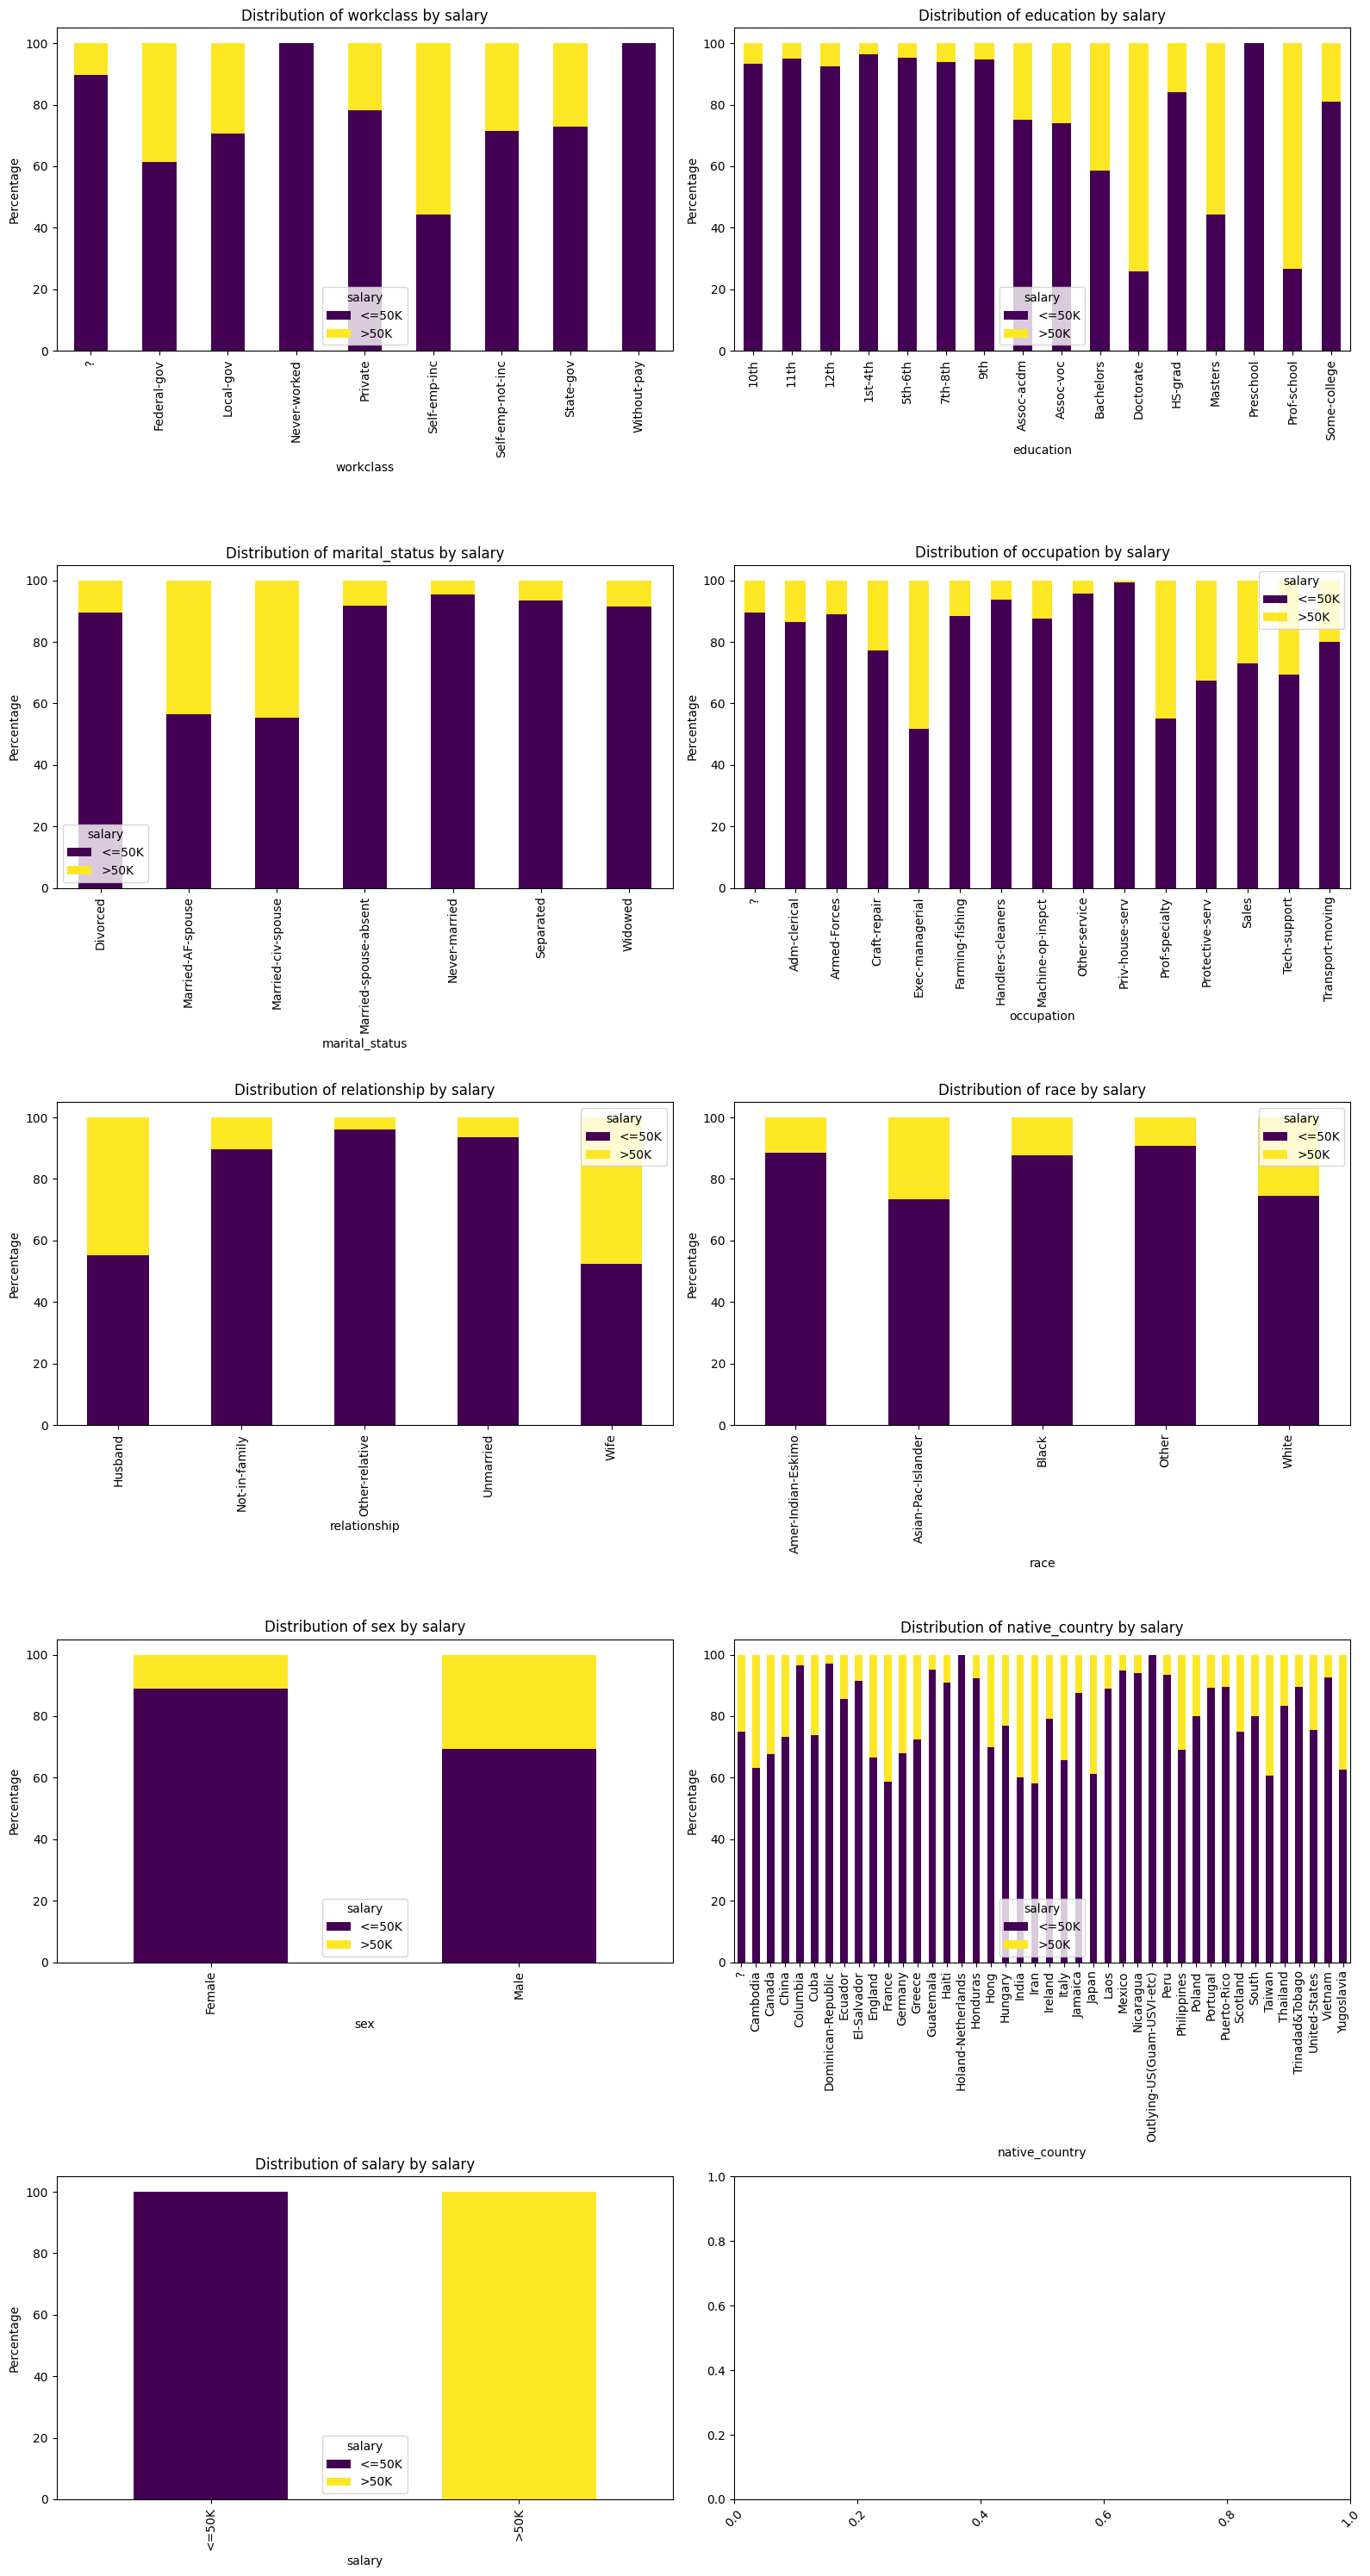

In [24]:

def visualize_categorical_distribution_with_target(df, categorical_cols, target_col, plot_type='count'):

    
    num_plots = len(categorical_cols)
    n_cols = 2  
    n_rows = math.ceil(num_plots / n_cols) 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))
    
    if n_rows == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i//n_cols][i%n_cols] if n_rows > 1 else axes[i%n_cols]
        if plot_type == 'count':
            sns.countplot(x=col, hue=target_col, data=df, palette='viridis', ax=ax)
        elif plot_type == 'percentage':
            (df.groupby(col)[target_col]
             .value_counts(normalize=True)
             .mul(100)
             .unstack()
             .plot(kind='bar', stacked=True, ax=ax, colormap='viridis'))
            
        ax.set_title(f"Distribution of {col} by {target_col}")
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage' if plot_type == 'percentage' else 'Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


visualize_categorical_distribution_with_target(df, categorical_cols, 'salary', 'percentage')


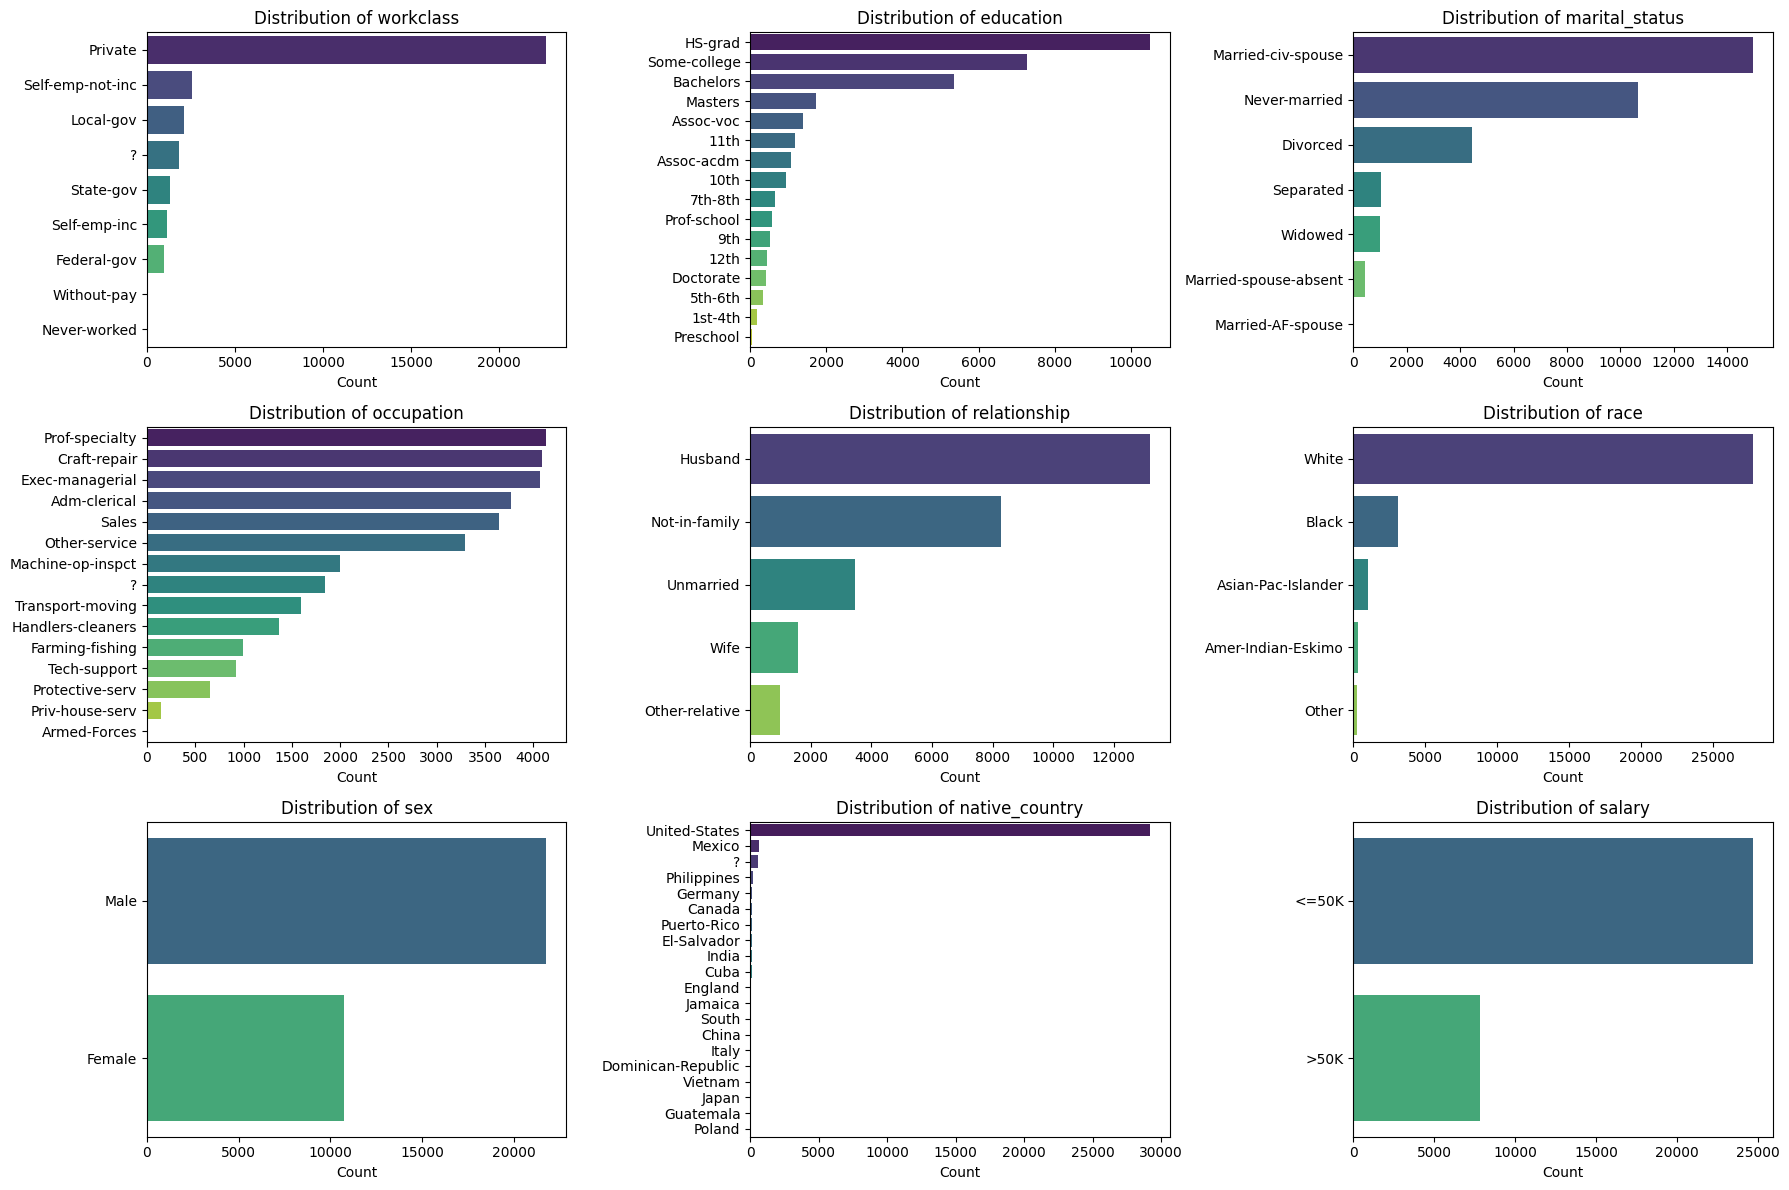

In [25]:
def visualize_categorical_columns_side_by_side(df):
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
   
    n_cols = 3
    n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)
    
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
    axes = axes.flatten()  
    
    for i, colname in enumerate(categorical_cols):
        ax = axes[i]
        
        value_counts = df[colname].value_counts().head(20)
        
        sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis', ax=ax)
        ax.set_title('Distribution of ' + colname)
        ax.set_xlabel('Count')
        ax.set_ylabel('')
    
    
    for j in range(i + 1, n_rows * n_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


visualize_categorical_columns_side_by_side(df)


In [26]:

analysis_results = """
### Analysis Conclusions

- Predominantly, individuals earn below 50K across all work classes, with a more balanced distribution observed in self-employment.
- Higher education levels, such as Doctorates and Professional degrees, are associated with incomes above 50K.
- The marital status of "Married-civ-spouse" correlates with a higher likelihood of earning more than 50K.
- Occupations in "Craft-Repair" and "Prof-specialty" have a notable proportion of earners above 50K.
- "Husbands" are more likely to be in the higher-earning group.
- Males frequently earn above 50K compared to females, highlighting the gender pay gap.
- Most individuals are employed in the private sector, with fewer in self-employment or government roles.
- A large segment of the population has completed high school as their highest educational level.
- A significant proportion of individuals are married, with "husband" as a common role, and "White" as the prevalent race, reflecting certain social and demographic dynamics.
- The data is heavily skewed towards the "United States," suggesting a focus on an American demographic in the dataset.
"""

console = Console()
console.print(Markdown(analysis_results))


Analysis Conclusions                                                

 • Predominantly, individuals earn below 50K across all work classes, with a more balanced distribution observed in
   self-employment.                                                                                                
 • Higher education levels, such as Doctorates and Professional degrees, are associated with incomes above 50K.    
 • The marital status of "Married-civ-spouse" correlates with a higher likelihood of earning more than 50K.        
 • Occupations in "Craft-Repair" and "Prof-specialty" have a notable proportion of earners above 50K.              
 • "Husbands" are more likely to be in the higher-earning group.                                                   
 • Males frequently earn above 50K compared to females, highlighting the gender pay gap.                           
 • Most individuals are employed in the private sector, with fewer in self-employment or government roles.         
 • A large segment of the population has completed high school as their highest educational level.                 
 • A significant proportion of individuals are married, with "husband" as a common role, and "White" as the        
   prevalent race, reflecting certain social and demographic dynamics.                                             
 • The data is heavily skewed towards the "United States," suggesting a focus on an American demographic in the    
   dataset.

<a id="5"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Other Specific Analysis Questions</p>



## Analysis Questions

### What is the average age of males and females by income level?

In [27]:
average_age_by_gender_and_income = df.groupby(['sex', 'salary'])['age'].mean()

table = Table(show_header=True, header_style="bold magenta")
table.add_column("Gender", style="dim")
table.add_column("Salary")
table.add_column("Average Age", justify="right")

for (gender, salary), avg_age in average_age_by_gender_and_income.items():
    table.add_row(gender, salary, f"{avg_age:.2f}")
table

┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Gender ┃ Salary ┃ Average Age ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━┩
│ Female │ <=50K  │       36.22 │
│ Female │ >50K   │       42.13 │
│ Male   │ <=50K  │       37.15 │
│ Male   │ >50K   │       44.63 │
└────────┴────────┴─────────────┘

### What is the workclass percentages of Americans in high-level income group?

In [28]:

high_income_americans = df[(df['salary'] == '>50K') & (df['native_country'] == 'United-States')]


workclass_distribution = high_income_americans['workclass'].value_counts(normalize=True) * 100

table = Table(show_header=True, header_style="bold magenta")
table.add_column("Workclass", style="dim")
table.add_column("Percentage", justify="right")

for workclass, percentage in workclass_distribution.items():
    table.add_row(workclass, f"{percentage:.2f}%")

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Workclass        ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Private          │     63.31% │
│ Self-emp-not-inc │      9.19% │
│ Local-gov        │      8.02% │
│ Self-emp-inc     │      7.78% │
│ Federal-gov      │      4.69% │
│ State-gov        │      4.55% │
│ ?                │      2.46% │
└──────────────────┴────────────┘

### What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [29]:

private_high_income_americans = df[
    (df['native_country'] == 'United-States') & 
    (df['workclass'] == 'Private') & 
    (df['salary'] == '>50K')
]
occupation_distribution = private_high_income_americans['occupation'].value_counts(normalize=True) * 100


table = Table(show_header=True, header_style="bold magenta")
table.add_column("Occupation", style="dim")
table.add_column("Percentage", justify="right")

for occupation, percentage in occupation_distribution.items():
    table.add_row(occupation, f"{percentage:.2f}%")


table

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Occupation        ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Exec-managerial   │     26.44% │
│ Prof-specialty    │     19.48% │
│ Craft-repair      │     14.69% │
│ Sales             │     14.47% │
│ Adm-clerical      │      6.39% │
│ Transport-moving  │      5.44% │
│ Tech-support      │      4.43% │
│ Machine-op-inspct │      4.43% │
│ Other-service     │      1.67% │
│ Handlers-cleaners │      1.34% │
│ Farming-fishing   │      0.59% │
│ Protective-serv   │      0.59% │
│ Priv-house-serv   │      0.02% │
└───────────────────┴────────────┘

<a id="6"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Dropping Similar & Unneccessary Features</p>

<a href="#content" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [30]:

df.drop(['population_weight'], axis=1, inplace=True)# 0.01 low corr


df['capital_change'] = df['capital_gain'] - df['capital_loss'] # Combine  
df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True) 


df.drop(['education'], axis=1, inplace=True) # use edu num 


<a id="7"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Handling with Missing Value</p>

<a href="#content" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [31]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country', 'salary'],
      dtype='object')

In [32]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100


table = Table(show_header=True, header_style="bold magenta")
table.add_column("Column", style="dim", width=30)
table.add_column("Missing Values", justify="right")
table.add_column("Percentage", justify="right")


for col, mv in missing_values.items():
    percentage = missing_percentage[col]
    if mv > 0:
        table.add_row(col, str(mv), f"{percentage:.2f}%")


table


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Column                         ┃ Missing Values ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ education_num                  │            802 │      2.46% │
│ relationship                   │           5064 │     15.56% │
└────────────────────────────────┴────────────────┴────────────┘

In [33]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight


relationship_counts_before = df['relationship'].value_counts()

le = LabelEncoder()


df['marital_status'] = le.fit_transform(df['marital_status'])
df['sex'] = le.fit_transform(df['sex'])
df['salary'] = le.fit_transform(df['salary'])


df['relationship'] = df['relationship'].fillna('Missing')
df['relationship'] = le.fit_transform(df['relationship'])


mask = df['relationship'] != le.transform(['Missing'])[0]
X = df.loc[mask, ['age', 'sex', 'marital_status', 'salary']]
y = df.loc[mask, 'relationship']


X_missing = df.loc[~mask, ['age', 'sex', 'marital_status', 'salary']]

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
weights = dict(zip(np.unique(y), class_weights))


model = LGBMClassifier(n_estimators=100, learning_rate=0.05, verbose=0, force_col_wise=True)

model.fit(X, y, sample_weight=y.map(weights))


predicted_relationship = model.predict(X_missing)

df.loc[df['relationship'] == le.transform(['Missing'])[0], 'relationship'] = predicted_relationship


relationship_counts_after = df['relationship'].value_counts()


comparison_data = {
    "Category": relationship_counts_before.index,
    "Counts Before": relationship_counts_before.values,
    "Counts After": relationship_counts_after.values,
    "Change": relationship_counts_after.values - relationship_counts_before.values
}

df_comparison = pd.DataFrame(comparison_data)

table = Table(show_header=True, header_style="bold magenta")
table.add_column("Category", style="dim", width=12)
table.add_column("Counts Before", justify="right")
table.add_column("Counts After", justify="right")
table.add_column("Change", justify="right")


for index, row in df_comparison.iterrows():
    table.add_row(
        row["Category"],
        str(row["Counts Before"]),
        str(row["Counts After"]),
        str(row["Change"])
    )


console.print(table) 

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Category     ┃ Counts Before ┃ Counts After ┃ Change ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Husband      │         13187 │        13233 │     46 │
│ Not-in-fami… │          8292 │         9411 │   1119 │
│ Unmarried    │          3445 │         4498 │   1053 │
│ Wife         │          1568 │         3783 │   2215 │
│ Other-relat… │           981 │         1612 │    631 │
└──────────────┴───────────────┴──────────────┴────────┘

In [34]:

education_num_mode = df['education_num'].mode()[0]
df['education_num'].fillna(education_num_mode, inplace=True)

In [35]:
#check
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100


table = Table(show_header=True, header_style="bold magenta")
table.add_column("Column", style="dim", width=30)
table.add_column("Missing Values", justify="right")
table.add_column("Percentage", justify="right")


for col, mv in missing_values.items():
    percentage = missing_percentage[col]
    if mv > 0:
        table.add_row(col, str(mv), f"{percentage:.2f}%")


table


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Column                         ┃ Missing Values ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
└────────────────────────────────┴────────────────┴────────────┘

<a id="8"></a>
<p style="background-color:plum; color:floralwhite; font-size:175%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4;">Handling with Outliers</p>

<a href="#content" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Analyzing all Features  and Detecting Extreme Values

In [36]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    df[c] = pd.factorize(df[c])[0]


In [37]:
mask = pd.Series([True] * df.shape[0], index=df.index)  

for col in df.columns:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    mask = mask & (df[col] >= lower_bound) & (df[col] <= upper_bound)


df_filtered = df[mask]


table = Table(show_header=True, header_style="bold magenta")


table.add_column("Dataset", style="dim", width=20)
table.add_column("Size", justify="right")


table.add_row("Original Dataset", str(df.shape[0]))
table.add_row("Filtered Dataset", str(df_filtered.shape[0]))


table

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Dataset              ┃  Size ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Original Dataset     │ 32537 │
│ Filtered Dataset     │ 30581 │
└──────────────────────┴───────┘